In [ ]:
import sys
import os

# Get the current working directory of the notebook
notebook_dir = os.getcwd()

# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from foreblocks import TimeSeriesPreprocessor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series data
np.random.seed(42)
n_samples = 200
timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='h')

# Create a time series with trend, seasonality, and noise
t = np.linspace(0, 4*np.pi, n_samples)
trend = 0.1 * t
seasonality1 = 2 * np.sin(t)  # Daily pattern
seasonality2 = 1 * np.sin(t/24)  # Weekly pattern
noise = np.random.normal(0, 0.5, n_samples)

# Combine components
data = (trend + seasonality1 + seasonality2 + noise).reshape(-1, 1)

# Create a second feature (to demonstrate multivariate capabilities)
data2 = (0.5 * trend + 1.5 * np.cos(t) + 0.5 * np.random.normal(0, 0.3, n_samples)).reshape(-1, 1)
data = np.hstack([data, data2])  # Now we have shape [n_samples, 2]

# Add some outliers
outlier_indices = np.random.choice(n_samples, 10, replace=False)
data[outlier_indices] = data[outlier_indices] + 5 * np.random.randn(10, 2)

# Add some missing values (but not too many)
missing_indices = np.random.choice(n_samples, 10, replace=False)
data[missing_indices, 0] = np.nan  # Only make some values missing in first feature

# Create preprocessor with various techniques enabled
preprocessor = TimeSeriesPreprocessor(
    normalize=True,
    differencing=False,
    detrend=True,
    apply_ewt=True,
    window_size=24,
    horizon=12,
    remove_outliers=True,
    outlier_threshold=0.05,
    outlier_method="iqr",
    impute_method="iterative",
    ewt_bands=5,
    trend_imf_idx=0,
    log_transform=False,
    filter_window=5,
    filter_polyorder=2,
    apply_filter=True,
    self_tune=True,
    apply_imputation=True,
)

# Fit and transform the data
X, y, processed_data, _ = preprocessor.fit_transform(data, time_stamps=timestamps)

# Visualize the results
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.title('Original Data with Outliers and Missing Values')
plt.plot(data)

plt.subplot(3, 1, 2)
plt.title('Processed Data')
print("Processed data shape:", processed_data.shape)
plt.plot(processed_data)

plt.subplot(3, 1, 3)
plt.title('EWT Components')
ewt_components = preprocessor.get_ewt_components()
if ewt_components:
    for i, imf in enumerate(ewt_components[0].T):
        plt.plot(imf, label=f'IMF {i}')
    plt.legend()

plt.tight_layout()
plt.show()

print(f"Input sequence shape: {X.shape}")
print(f"Target sequence shape: {y.shape}")

In [ ]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ─── Fix path ─────────────────────────────
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# ─── Synthetic time series ────────────────
np.random.seed(42)
n_samples = 200
timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='h')

t = np.linspace(0, 4 * np.pi, n_samples)
trend = 0.1 * t
seasonality1 = 2 * np.sin(t)
seasonality2 = 1 * np.sin(t / 24)
noise = np.random.normal(0, 0.5, n_samples)
data = (trend + seasonality1 + seasonality2 + noise).reshape(-1, 1)

# ─── Import feature extractor ─────────────
from foreblocks.ts_fengine import SignalProcessor

fengine = SignalProcessor()

# ─── Feature extraction ───────────────────
window_size = 48
step_size = 24
signals = {'signal': data.flatten()}
labels = {'signal': 0}  # dummy label

features, feature_labels, raw_windows, window_labels = fengine.process_signals(
    signals, labels, window_size=window_size, step_size=step_size, augment=True
)

selected_names = fengine.get_selected_feature_names()
print(f"Selected {len(selected_names)} features:")
print(selected_names)

# ─── Create dataframe ─────────────────────
feature_names = fengine.feature_engineer.get_feature_names()
features_df = pd.DataFrame(features, columns=feature_names)
#features_df.index = timestamps[window_size - 1::step_size][:len(features_df)]

# ─── Display ──────────────────────────────
print(features_df.head())
print(feature_names[:5], "...")  # preview names


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from typing import Tuple, Optional, Dict, List

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional, Dict, List

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Optional, Dict, List


# =============== TIME-SERIES AWARE GAN FOR SIGNAL AUGMENTATION ===============

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# ===================== Self-Attention Block (Optional) =====================
import os
os.environ["PYTORCH_SDP_ATTENTION"] = "never"  # Force safe attention mode

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# ========== Positional Encoding ==========
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=1000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-np.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer("pe", pe.unsqueeze(0))  # shape (1, T, D)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


# ========== Transformer Generator ==========
class TransformerGenerator(nn.Module):
    def __init__(self, noise_dim=128, signal_length=1000, model_dim=128, num_layers=4, nhead=4):
        super().__init__()
        self.signal_length = signal_length
        self.input_proj = nn.Linear(noise_dim, model_dim)
        self.pos_enc = PositionalEncoding(model_dim, max_len=signal_length)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_proj = nn.Linear(model_dim, 1)

    def forward(self, z):
        # z: (B, noise_dim)
        B = z.size(0)
        x = z.unsqueeze(1).repeat(1, self.signal_length, 1)  # (B, T, noise_dim)
        x = self.input_proj(x)                               # (B, T, D)
        x = self.pos_enc(x)
        x = self.encoder(x)                                  # (B, T, D)
        return self.output_proj(x).squeeze(-1)               # (B, T)


# ========== Transformer Discriminator ==========
class TransformerDiscriminator(nn.Module):
    def __init__(self, signal_length=1000, model_dim=128, num_layers=4, nhead=4):
        super().__init__()
        self.input_proj = nn.Linear(1, model_dim)
        self.pos_enc = PositionalEncoding(model_dim, max_len=signal_length)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=nhead, batch_first=True)
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_proj = nn.Linear(model_dim, 1)

    def forward(self, x):
        # x: (B, T)
        x = x.unsqueeze(-1)                  # (B, T, 1)
        x = self.input_proj(x)              # (B, T, D)
        x = self.pos_enc(x)
        h = self.encoder(x)                 # (B, T, D)
        return self.output_proj(h).mean(dim=1)  # (B,)


# ========== GAN Trainer ==========
class SignalTransformerGAN:
    def __init__(self, signal_length=1000, noise_dim=128, lambda_gp=1.0, lr=1e-4):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.signal_length = signal_length
        self.noise_dim = noise_dim
        self.lambda_gp = lambda_gp

        self.G = TransformerGenerator(noise_dim, signal_length).to(self.device)
        self.D = TransformerDiscriminator(signal_length).to(self.device)
        self.G_ema = TransformerGenerator(noise_dim, signal_length).to(self.device)
        self.G_ema.load_state_dict(self.G.state_dict())

        self.g_optim = optim.Adam(self.G.parameters(), lr=lr, betas=(0.5, 0.9))
        self.d_optim = optim.Adam(self.D.parameters(), lr=lr, betas=(0.5, 0.9))

        self.g_losses = []
        self.d_losses = []

    def gradient_penalty(self, real, fake):
        alpha = torch.rand(real.size(0), 1, device=self.device)
        interp = alpha * real + (1 - alpha) * fake
        interp.requires_grad_()
        d_interp = self.D(interp)
        grads = torch.autograd.grad(
            outputs=d_interp, inputs=interp,
            grad_outputs=torch.ones_like(d_interp),
            create_graph=True, retain_graph=True, only_inputs=True
        )[0]
        return ((grads.norm(2, dim=1) - 1) ** 2).mean()

    def update_ema(self, decay=0.999):
        with torch.no_grad():
            for p_ema, p in zip(self.G_ema.parameters(), self.G.parameters()):
                p_ema.data.mul_(decay).add_(p.data, alpha=1 - decay)

    def train(self, signals: np.ndarray, epochs=100, batch_size=64, critic_iters=5):
        self.signal_mean = signals.mean()
        self.signal_std = signals.std()
        signals = (signals - self.signal_mean) / (self.signal_std + 1e-8)

        data = torch.FloatTensor(signals).to(self.device)
        dataloader = DataLoader(TensorDataset(data), batch_size=batch_size, shuffle=True, drop_last=True)

        for epoch in range(epochs):
            g_loss_epoch = 0
            d_loss_epoch = 0

            for real_batch, in dataloader:
                real_batch = real_batch.to(self.device)
                B = real_batch.size(0)

                # === Train Discriminator ===
                for _ in range(critic_iters):
                    self.d_optim.zero_grad()
                    z = torch.randn(B, self.noise_dim, device=self.device)
                    fake = self.G(z).detach()
                    d_real = self.D(real_batch)
                    d_fake = self.D(fake)
                    gp = self.gradient_penalty(real_batch, fake)
                    d_loss = d_fake.mean() - d_real.mean() + self.lambda_gp * gp
                    d_loss.backward()
                    self.d_optim.step()

                # === Train Generator ===
                self.g_optim.zero_grad()
                z = torch.randn(B, self.noise_dim, device=self.device)
                fake = self.G(z)
                g_loss = F.softplus(-self.D(fake)).mean()
                g_loss.backward()
                self.g_optim.step()

                self.update_ema()

                g_loss_epoch += g_loss.item()
                d_loss_epoch += d_loss.item()

            self.g_losses.append(g_loss_epoch / len(dataloader))
            self.d_losses.append(d_loss_epoch / len(dataloader))
            if epoch % 10 == 0 or epoch == epochs - 1:
                with torch.no_grad():
                    out = self.G(torch.randn(4, self.noise_dim, device=self.device))
                    print(f"[{epoch+1}] G: {self.g_losses[-1]:.4f}, D: {self.d_losses[-1]:.4f}, "
                          f"mean: {out.mean().item():.4f}, std: {out.std().item():.4f}")

    def generate(self, n_samples=1, use_ema=True):
        model = self.G_ema if use_ema else self.G
        model.eval()
        with torch.no_grad():
            z = torch.randn(n_samples, self.noise_dim, device=self.device)
            x = model(z)
            return (x * self.signal_std + self.signal_mean).cpu().numpy()


# =============== TIME-SERIES AWARE VAE FOR SIGNAL AUGMENTATION ===============

class ConvSignalEncoder(nn.Module):
    """Convolutional encoder for time-series signals."""
    
    def __init__(self, signal_length: int = 1000, latent_dim: int = 128):
        super().__init__()
        self.signal_length = signal_length
        self.latent_dim = latent_dim
        
        # Convolutional layers for downsampling
        layers = []
        channels = [1, 32, 64, 128, 256]
        current_length = signal_length
        
        for i in range(len(channels) - 1):
            layers.extend([
                nn.Conv1d(channels[i], channels[i+1], kernel_size=4, stride=2, padding=1),
                nn.BatchNorm1d(channels[i+1]),
                nn.LeakyReLU(0.2, inplace=True)
            ])
            current_length = current_length // 2
        
        self.conv_layers = nn.Sequential(*layers)
        
        # Calculate the size after convolutions
        self.conv_output_size = channels[-1] * max(1, current_length)
        
        # Latent space projections
        self.fc_mu = nn.Linear(self.conv_output_size, latent_dim)
        self.fc_logvar = nn.Linear(self.conv_output_size, latent_dim)
        
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, nn.Conv1d):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='leaky_relu')
        elif isinstance(m, nn.BatchNorm1d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, 0, 0.02)
    
    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        # Add channel dimension if needed
        if x.dim() == 2:
            x = x.unsqueeze(1)
        
        # Apply convolutional layers
        x = self.conv_layers(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Get latent parameters
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        
        return mu, logvar


class ConvSignalDecoder(nn.Module):
    """Convolutional decoder for time-series signals."""
    
    def __init__(self, latent_dim: int = 128, signal_length: int = 1000):
        super().__init__()
        self.signal_length = signal_length
        
        # Calculate initial size for upsampling
        self.init_size = signal_length // 16
        self.init_channels = 256
        
        # Initial projection
        self.fc = nn.Linear(latent_dim, self.init_channels * self.init_size)
        
        # Convolutional upsampling blocks
        self.conv_blocks = nn.Sequential(
            # First upsampling
            nn.ConvTranspose1d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            
            # Second upsampling
            nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            
            # Third upsampling
            nn.ConvTranspose1d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(32),
            nn.ReLU(inplace=True),
            
            # Fourth upsampling
            nn.ConvTranspose1d(32, 16, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm1d(16),
            nn.ReLU(inplace=True),
            
            # Final layer
            nn.Conv1d(16, 1, kernel_size=7, padding=3),
            nn.Tanh()
        )
        
        self.apply(self._init_weights)
    
    def _init_weights(self, m):
        if isinstance(m, (nn.ConvTranspose1d, nn.Conv1d)):
            nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
        elif isinstance(m, nn.BatchNorm1d):
            nn.init.constant_(m.weight, 1)
            nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.Linear):
            nn.init.normal_(m.weight, 0, 0.02)
    
    def forward(self, z: torch.Tensor) -> torch.Tensor:
        # Project to feature map
        x = self.fc(z)
        x = x.view(x.size(0), self.init_channels, self.init_size)
        
        # Apply upsampling
        x = self.conv_blocks(x)
        
        # Ensure exact signal length
        if x.size(-1) != self.signal_length:
            x = F.interpolate(x, size=self.signal_length, mode='linear', align_corners=False)
        
        return x.squeeze(1)


class ImprovedSignalVAE:
    """Improved VAE with convolutional architecture for time-series."""
    
    def __init__(self, signal_length: int = 1000, latent_dim: int = 128, lr: float = 0.001, beta: float = 0.5):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.latent_dim = latent_dim
        self.beta = beta
        self.signal_length = signal_length
        
        # Networks
        self.encoder = ConvSignalEncoder(signal_length, latent_dim).to(self.device)
        self.decoder = ConvSignalDecoder(latent_dim, signal_length).to(self.device)
        
        # Optimizer
        self.optimizer = optim.Adam(
            list(self.encoder.parameters()) + list(self.decoder.parameters()), 
            lr=lr, weight_decay=1e-5
        )
        
        # Learning rate scheduler
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', factor=0.8, patience=15
        )
        
        self.is_trained = False
        
        # Training history
        self.losses = []
        self.recon_losses = []
        self.kl_losses = []
    
    def reparameterize(self, mu: torch.Tensor, logvar: torch.Tensor) -> torch.Tensor:
        """Reparameterization trick with numerical stability."""
        std = torch.exp(0.5 * logvar.clamp(-10, 10))
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def train(self, signals: np.ndarray, epochs: int = 150, batch_size: int = 32, verbose: bool = True):
        """Train improved VAE."""
        # Normalize signals
        self.signal_mean = signals.mean()
        self.signal_std = signals.std()
        signals_normalized = (signals - self.signal_mean) / (self.signal_std + 1e-8)
        
        # Prepare data
        data = torch.FloatTensor(signals_normalized).to(self.device)
        dataloader = DataLoader(TensorDataset(data), batch_size=batch_size, shuffle=True)
        
        self.encoder.train()
        self.decoder.train()
        
        for epoch in range(epochs):
            epoch_loss = 0
            epoch_recon_loss = 0
            epoch_kl_loss = 0
            
            # Gradually increase beta
            current_beta = min(self.beta, self.beta * (epoch / 50))
            
            for batch_data, in dataloader:
                self.optimizer.zero_grad()
                
                # Forward pass
                mu, logvar = self.encoder(batch_data)
                z = self.reparameterize(mu, logvar)
                recon = self.decoder(z)
                
                # Losses
                recon_loss = F.mse_loss(recon, batch_data, reduction='sum')
                kl_loss = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
                
                # Total loss
                loss = recon_loss + current_beta * kl_loss
                
                # Add frequency domain loss for better signal reconstruction
                if epoch > 30:
                    recon_fft = torch.fft.fft(recon).abs()
                    batch_fft = torch.fft.fft(batch_data).abs()
                    freq_loss = F.mse_loss(recon_fft, batch_fft, reduction='sum')
                    loss += 0.05 * freq_loss
                
                loss.backward()
                
                # Gradient clipping
                torch.nn.utils.clip_grad_norm_(
                    list(self.encoder.parameters()) + list(self.decoder.parameters()), 
                    0.5
                )
                
                self.optimizer.step()
                
                epoch_loss += loss.item()
                epoch_recon_loss += recon_loss.item()
                epoch_kl_loss += kl_loss.item()
            
            # Store losses
            avg_loss = epoch_loss / len(dataloader.dataset)
            avg_recon_loss = epoch_recon_loss / len(dataloader.dataset)
            avg_kl_loss = epoch_kl_loss / len(dataloader.dataset)
            
            self.losses.append(avg_loss)
            self.recon_losses.append(avg_recon_loss)
            self.kl_losses.append(avg_kl_loss)
            
            # Update learning rate
            self.scheduler.step(avg_loss)
            
            if verbose and (epoch + 1) % 30 == 0:
                print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}, "
                      f"Recon: {avg_recon_loss:.4f}, KL: {avg_kl_loss:.4f}, β: {current_beta:.3f}")
        
        self.is_trained = True
    
    def generate(self, n_samples: int = 1) -> np.ndarray:
        """Generate signals from random latent vectors."""
        self.decoder.eval()
        with torch.no_grad():
            z = torch.randn(n_samples, self.latent_dim, device=self.device)
            fake_signals = self.decoder(z)
            
            # Denormalize
            fake_signals = fake_signals * self.signal_std + self.signal_mean
        return fake_signals.cpu().numpy()
    
    def encode_decode(self, signals: np.ndarray, noise_scale: float = 0.2) -> np.ndarray:
        """Encode signals to latent space, add noise, and decode back."""
        self.encoder.eval()
        self.decoder.eval()
        
        # Normalize input
        signals_normalized = (signals - self.signal_mean) / (self.signal_std + 1e-8)
        
        with torch.no_grad():
            data = torch.FloatTensor(signals_normalized).to(self.device)
            mu, logvar = self.encoder(data)
            
            # Add controlled noise in latent space
            std = torch.exp(0.5 * logvar)
            noise = torch.randn_like(std) * noise_scale
            z = mu + noise * std
            
            augmented = self.decoder(z)
            
            # Denormalize
            augmented = augmented * self.signal_std + self.signal_mean
            
        return augmented.cpu().numpy()


# =============== DIFFUSION FOR SIGNAL AUGMENTATION ===============

class SignalDiffusion:
    """Diffusion-based noise injection and denoising for signal augmentation."""
    
    def __init__(self, signal_length: int = 1000, max_steps: int = 50):
        self.signal_length = signal_length
        self.max_steps = max_steps
        
        # Noise schedule
        self.betas = torch.linspace(0.0001, 0.02, max_steps)
        self.alphas = 1 - self.betas
        self.alphas_cumprod = torch.cumprod(self.alphas, dim=0)
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.betas = self.betas.to(self.device)
        self.alphas_cumprod = self.alphas_cumprod.to(self.device)
    
    def add_noise(self, signals: np.ndarray, noise_level: float = 0.5) -> np.ndarray:
        """Add controlled noise using diffusion schedule."""
        data = torch.FloatTensor(signals).to(self.device)
        
        # Choose noise level (timestep)
        t = int(noise_level * self.max_steps)
        t = min(t, self.max_steps - 1)
        
        # Add noise according to schedule
        noise = torch.randn_like(data)
        alpha_cumprod_t = self.alphas_cumprod[t]
        
        noisy_data = torch.sqrt(alpha_cumprod_t) * data + torch.sqrt(1 - alpha_cumprod_t) * noise
        
        return noisy_data.cpu().numpy()
    
    def denoise(self, noisy_signals: np.ndarray, steps: int = 10) -> np.ndarray:
        """Denoise signals using iterative smoothing."""
        data = torch.FloatTensor(noisy_signals).to(self.device)
        
        # Iterative denoising with smoothing filter
        for _ in range(steps):
            # Apply smoothing filter
            kernel = torch.ones(1, 1, 5, device=self.device) / 5
            if data.dim() == 2:
                data_padded = F.pad(data.unsqueeze(1), (2, 2), mode='reflect')
            else:
                data_padded = F.pad(data, (2, 2), mode='reflect')
            
            smoothed = F.conv1d(data_padded, kernel, padding=0)
            if data.dim() == 2:
                smoothed = smoothed.squeeze(1)
            
            # Mix with original
            data = 0.7 * smoothed + 0.3 * data
        
        return data.cpu().numpy()


# =============== FACTORY FUNCTIONS (with backward compatibility) ===============

def create_signal_gan(signals: np.ndarray, signal_length: int = None, train_epochs: int = 200) -> SignalGAN:
    """Create and train an improved GAN model for signal augmentation."""
    if signal_length is None:
        signal_length = signals.shape[1] if signals.ndim > 1 else len(signals)
    
    gan = SignalGAN(noise_dim=128, signal_length=signal_length)
    
    if len(signals) > 0:
        print(f"Training GAN on {len(signals)} signals for {train_epochs} epochs...")
        gan.train(signals, epochs=train_epochs)
        print("GAN training complete!")
    
    return gan


def create_signal_vae(signals: np.ndarray, signal_length: int = None, train_epochs: int = 150) -> ImprovedSignalVAE:
    """Create and train an improved VAE model for signal augmentation."""
    if signal_length is None:
        signal_length = signals.shape[1] if signals.ndim > 1 else len(signals)
    
    vae = ImprovedSignalVAE(signal_length=signal_length, latent_dim=128, beta=0.5)
    
    if len(signals) > 0:
        print(f"Training VAE on {len(signals)} signals for {train_epochs} epochs...")
        vae.train(signals, epochs=train_epochs)
        print("VAE training complete!")
    
    return vae


def create_signal_diffusion(signal_length: int = 1000) -> SignalDiffusion:
    """Create a diffusion model for signal augmentation (no training required)."""
    return SignalDiffusion(signal_length=signal_length)


# =============== EXAMPLE USAGE ===============
import matplotlib.pyplot as plt

def plot_signal_comparison(results):
    """Plot original signals against generated ones from all models."""
    
    # Extract data from results
    original_signals = results['original_signals']
    gan_samples = results['gan_samples']
    vae_samples = results['vae_samples']
    vae_augmented = results['vae_augmented']
    diffusion_augmented = results['diffusion_augmented']
    
    # Number of signals to plot (max 5 for clarity)
    n_plots = min(5, len(original_signals))
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_plots, 5, figsize=(20, 4*n_plots))
    if n_plots == 1:
        axes = axes.reshape(1, -1)
    
    # Define colors for each type
    colors = {
        'original': '#2E86C1',
        'gan': '#E74C3C', 
        'vae_gen': '#28B463',
        'vae_aug': '#F39C12',
        'diffusion': '#8E44AD'
    }
    
    for i in range(n_plots):
        # Plot original signal
        axes[i, 0].plot(original_signals[i], color=colors['original'], linewidth=2)
        axes[i, 0].set_title(f'Original Signal {i+1}', fontsize=12, fontweight='bold')
        axes[i, 0].grid(True, alpha=0.3)
        axes[i, 0].set_ylabel('Amplitude')
        
        # Plot GAN generated
        axes[i, 1].plot(gan_samples[i], color=colors['gan'], linewidth=2)
        axes[i, 1].set_title(f'GAN Generated {i+1}', fontsize=12, fontweight='bold')
        axes[i, 1].grid(True, alpha=0.3)
        
        # Plot VAE generated
        axes[i, 2].plot(vae_samples[i], color=colors['vae_gen'], linewidth=2)
        axes[i, 2].set_title(f'VAE Generated {i+1}', fontsize=12, fontweight='bold')
        axes[i, 2].grid(True, alpha=0.3)
        
        # Plot VAE augmented
        axes[i, 3].plot(vae_augmented[i], color=colors['vae_aug'], linewidth=2)
        axes[i, 3].set_title(f'VAE Augmented {i+1}', fontsize=12, fontweight='bold')
        axes[i, 3].grid(True, alpha=0.3)
        
        # Plot diffusion augmented
        axes[i, 4].plot(diffusion_augmented[i], color=colors['diffusion'], linewidth=2)
        axes[i, 4].set_title(f'Diffusion Augmented {i+1}', fontsize=12, fontweight='bold')
        axes[i, 4].grid(True, alpha=0.3)
        
        # Set x-label only for bottom row
        if i == n_plots - 1:
            for j in range(5):
                axes[i, j].set_xlabel('Sample Index')
    
    plt.tight_layout()
    plt.suptitle('Signal Generation Comparison: Original vs Generated', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()


def plot_overlay_comparison(results):
    """Plot overlays of original vs generated signals for direct comparison."""
    
    original_signals = results['original_signals']
    gan_samples = results['gan_samples']
    vae_samples = results['vae_samples']
    vae_augmented = results['vae_augmented']
    diffusion_augmented = results['diffusion_augmented']
    
    # Plot first 3 signals as overlays
    n_plots = min(3, len(original_signals))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()
    
    titles = ['GAN vs Original', 'VAE Generated vs Original', 
              'VAE Augmented vs Original', 'Diffusion vs Original']
    generated_data = [gan_samples, vae_samples, vae_augmented, diffusion_augmented]
    colors_gen = ['#E74C3C', '#28B463', '#F39C12', '#8E44AD']
    
    for plot_idx in range(4):
        ax = axes[plot_idx]
        
        for i in range(n_plots):
            # Plot original (lighter)
            ax.plot(original_signals[i], color='#2E86C1', alpha=0.6, 
                   linewidth=1.5, label='Original' if i == 0 else '')
            
            # Plot generated (darker)
            ax.plot(generated_data[plot_idx][i], color=colors_gen[plot_idx], 
                   alpha=0.8, linewidth=2, label='Generated' if i == 0 else '')
        
        ax.set_title(titles[plot_idx], fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_xlabel('Sample Index')
        ax.set_ylabel('Amplitude')
        ax.legend()
    
    plt.tight_layout()
    plt.suptitle('Overlay Comparison: Generated vs Original Signals', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()


def plot_signal_statistics(results):
    """Plot statistical comparison of generated signals."""
    
    original_signals = results['original_signals']
    gan_samples = results['gan_samples']
    vae_samples = results['vae_samples']
    vae_augmented = results['vae_augmented']
    diffusion_augmented = results['diffusion_augmented']
    
    # Calculate statistics
    def calc_stats(signals):
        means = [np.mean(signal) for signal in signals]
        stds = [np.std(signal) for signal in signals]
        return np.mean(means), np.mean(stds), np.min([np.min(s) for s in signals]), np.max([np.max(s) for s in signals])
    
    signal_types = ['Original', 'GAN', 'VAE Generated', 'VAE Augmented', 'Diffusion']
    all_signals = [original_signals, gan_samples, vae_samples, vae_augmented, diffusion_augmented]
    
    stats = [calc_stats(signals) for signals in all_signals]
    means = [s[0] for s in stats]
    stds = [s[1] for s in stats]
    mins = [s[2] for s in stats]
    maxs = [s[3] for s in stats]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Mean values
    axes[0, 0].bar(signal_types, means, color=['#2E86C1', '#E74C3C', '#28B463', '#F39C12', '#8E44AD'])
    axes[0, 0].set_title('Mean Amplitude', fontweight='bold')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].grid(True, alpha=0.3)
    
    # Standard deviations
    axes[0, 1].bar(signal_types, stds, color=['#2E86C1', '#E74C3C', '#28B463', '#F39C12', '#8E44AD'])
    axes[0, 1].set_title('Standard Deviation', fontweight='bold')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, alpha=0.3)
    
    # Min values
    axes[1, 0].bar(signal_types, mins, color=['#2E86C1', '#E74C3C', '#28B463', '#F39C12', '#8E44AD'])
    axes[1, 0].set_title('Minimum Value', fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Max values
    axes[1, 1].bar(signal_types, maxs, color=['#2E86C1', '#E74C3C', '#28B463', '#F39C12', '#8E44AD'])
    axes[1, 1].set_title('Maximum Value', fontweight='bold')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.suptitle('Statistical Comparison of Generated Signals', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.show()


# Update the demonstrate_signal_generative_models function to include plotting
def demonstrate_signal_generative_models():
    """Demonstrate the generative models for signal augmentation."""
    print("=== Signal Generative Models for Augmentation ===")
    
    # Create sample signals
    n_signals = 100
    signal_length = 1000
    t = np.linspace(0, 1, signal_length)
    
    # Generate diverse sample signals
    signals = []
    for i in range(n_signals):
        freq1 = 10 + i * 0.5
        freq2 = 30 + i * 0.3
        signal = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t)
        signal += 0.1 * np.random.randn(signal_length)
        signals.append(signal)
    
    signals = np.array(signals)
    print(f"Created {len(signals)} training signals of length {signal_length}")
    
    # Test GAN
    print("\n--- Testing SignalGAN ---")
    gan = create_signal_gan(signals, train_epochs=20)
    gan_samples = gan.generate(5)
    print(f"Generated {len(gan_samples)} GAN samples")
    
    # Test VAE
    print("\n--- Testing SignalVAE ---")
    vae = create_signal_vae(signals, train_epochs=20)
    vae_samples = vae.generate(5)
    vae_augmented = vae.encode_decode(signals[:5], noise_scale=0.2)
    print(f"Generated {len(vae_samples)} VAE samples")
    print(f"Augmented {len(vae_augmented)} signals via VAE latent space")
    
    # Test Diffusion
    print("\n--- Testing SignalDiffusion ---")
    diffusion = create_signal_diffusion(signal_length)
    noisy_signals = diffusion.add_noise(signals[:5], noise_level=0.3)
    denoised_signals = diffusion.denoise(noisy_signals, steps=5)
    print(f"Applied diffusion noise and denoising to {len(denoised_signals)} signals")
    
    print("\n=== All generative models ready for augmentation! ===")
    
    results = {
        'gan': gan,
        'vae': vae,
        'diffusion': diffusion,
        'original_signals': signals[:5],  # First 5 for plotting
        'gan_samples': gan_samples,
        'vae_samples': vae_samples,
        'vae_augmented': vae_augmented,
        'diffusion_augmented': denoised_signals
    }
    
    # =============== PLOTTING SECTION ===============
    print("\n=== Plotting Signal Comparisons ===")
    
    # Individual comparison plots
    print("Generating individual signal comparison plots...")
    plot_signal_comparison(results)
    
    # Overlay comparison plots
    print("Generating overlay comparison plots...")
    plot_overlay_comparison(results)
    
    # Statistical comparison
    print("Generating statistical comparison plots...")
    plot_signal_statistics(results)
    
    print("All plots generated successfully!")
    
    return results


if __name__ == "__main__":
    results = demonstrate_signal_generative_models()

Training data shape: (1000, 256)

=== Training Fast GAN ===
Training on device: cuda
Original signal stats - Mean: 0.0020, Std: 0.9368
Processed signal stats - Mean: 0.0007, Std: 0.4072
[Epoch 1/50] G: 0.4431 | D: 6.9944
[Epoch 11/50] G: 0.6518 | D: 1.2388
[Epoch 21/50] G: -1.9577 | D: 2.2542
[Epoch 31/50] G: -1.8501 | D: 3.5578
[Epoch 41/50] G: 0.1273 | D: 7.6077


KeyboardInterrupt: 

Training data shape: (1000, 256)

=== Training Fast and Effective SignalGAN ===
Training on device: cuda
Original signal stats - Mean: 0.0020, Std: 0.9368, Min: -2.3003, Max: 2.3013
Processed signal stats - Mean: -0.0001, Std: 0.6126, Min: -1.0000, Max: 1.0000
[Epoch 1/80] G: -0.6944 | D: -1.2637
  Generated stats - Mean: -0.1578, Std: 0.8645, Min: -1.9049, Max: 1.5640
[Epoch 11/80] G: -0.0348 | D: -1.5674
  Generated stats - Mean: 0.0498, Std: 1.3700, Min: -2.2116, Max: 2.1694
[Epoch 21/80] G: -2.5100 | D: -1.8669
  Generated stats - Mean: 0.0431, Std: 1.3917, Min: -2.1843, Max: 2.1554
[Epoch 31/80] G: 0.6340 | D: -2.0027
  Generated stats - Mean: 0.0030, Std: 1.2287, Min: -2.1410, Max: 2.1096
[Epoch 41/80] G: 2.7432 | D: -2.2228
  Generated stats - Mean: -0.0635, Std: 1.5265, Min: -2.1800, Max: 2.1718
[Epoch 51/80] G: 1.2186 | D: -2.5264
  Generated stats - Mean: -0.0771, Std: 1.4367, Min: -2.1219, Max: 2.1643
[Epoch 61/80] G: 1.0902 | D: -2.4534
  Generated stats - Mean: -0.0550, St

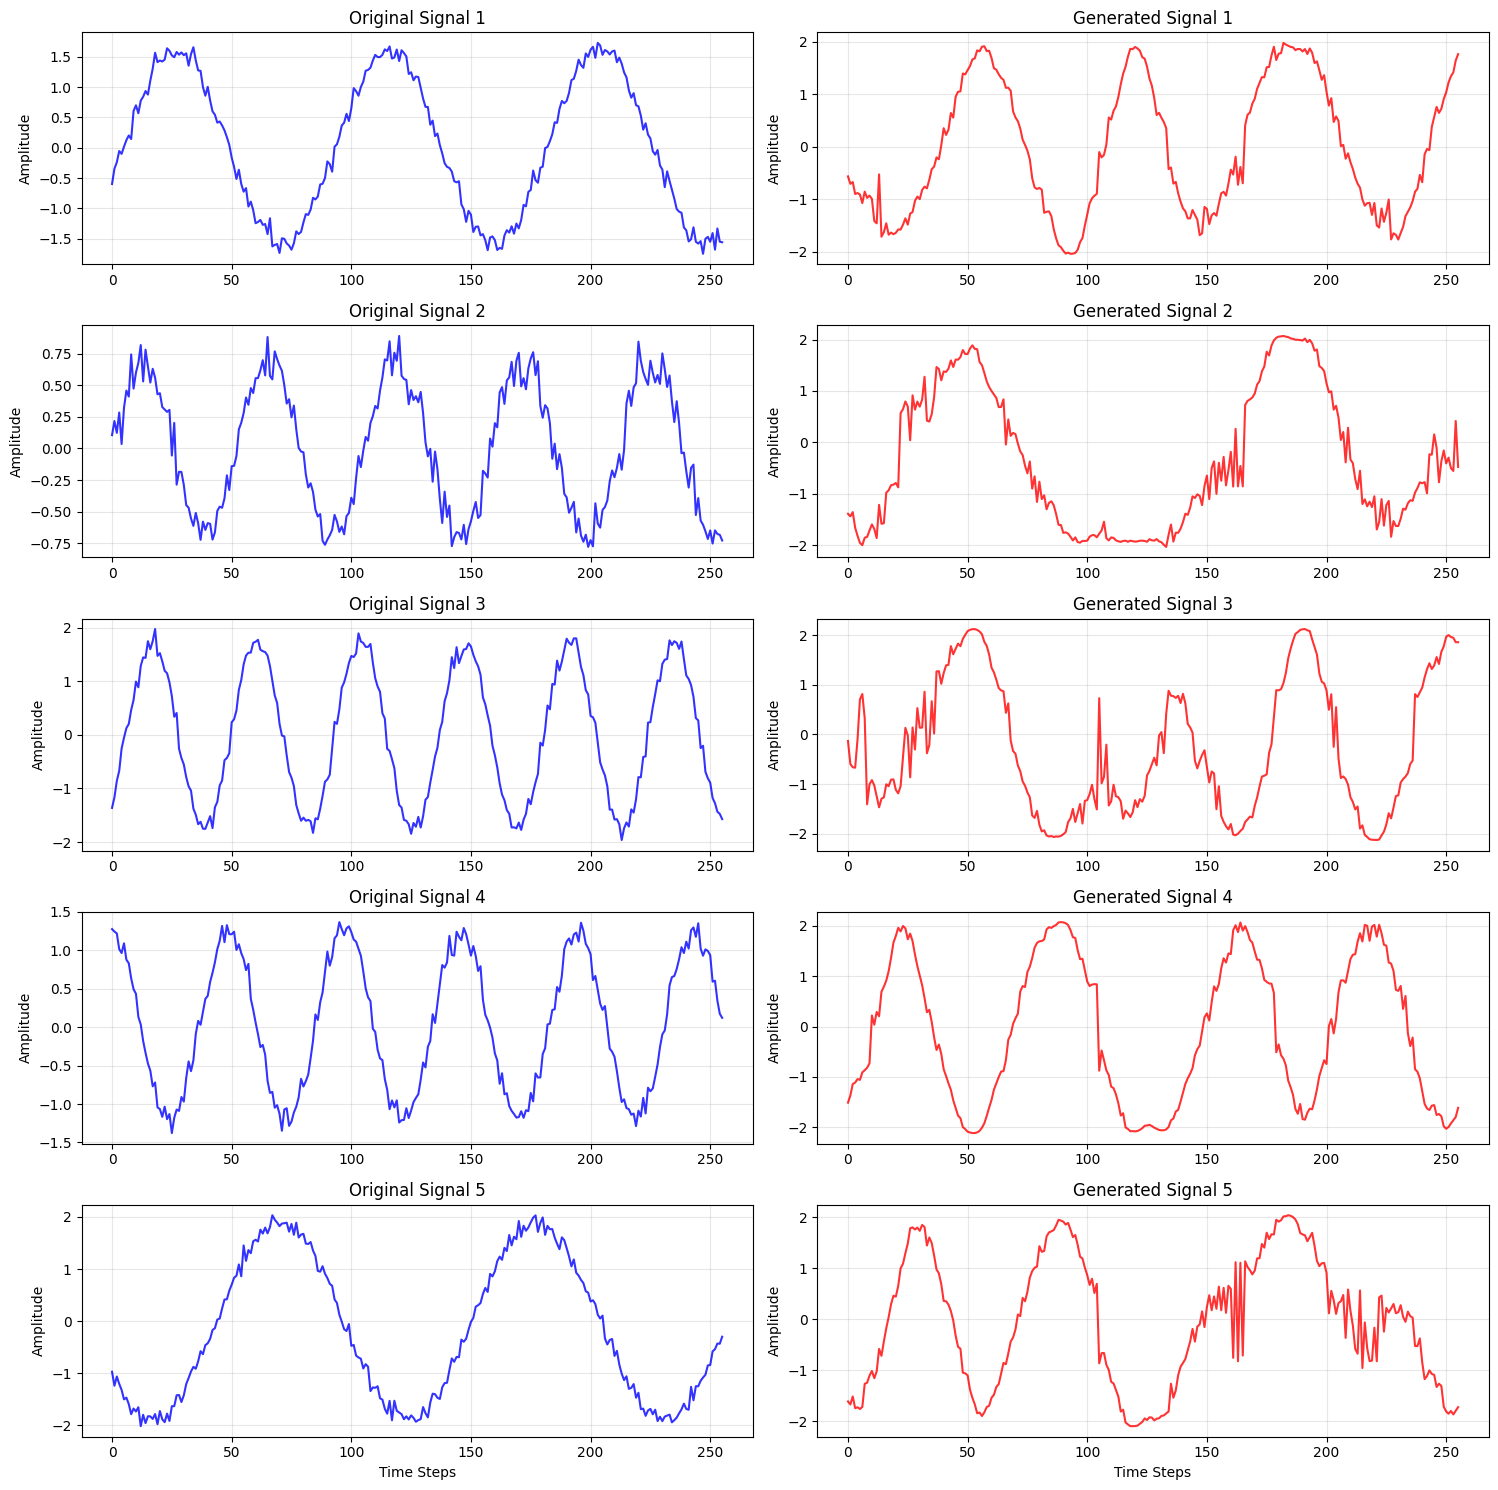

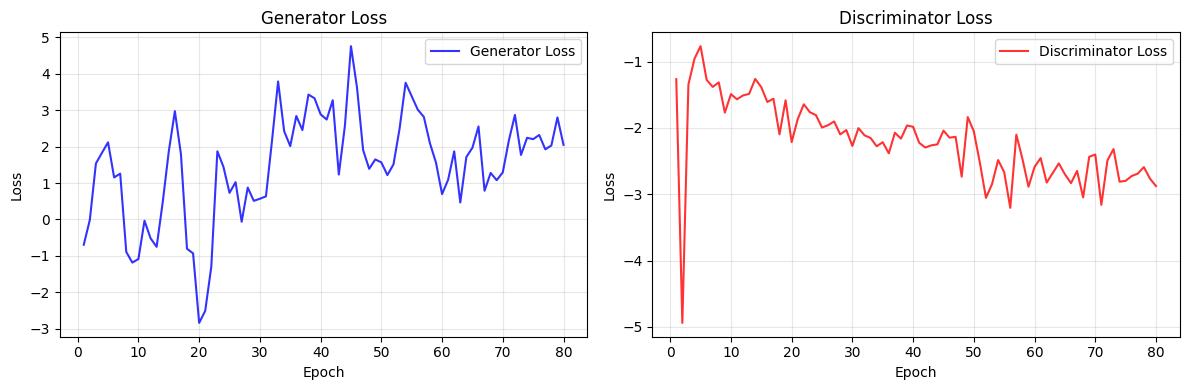

: 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import math

# ===================== Fast and Effective Generator =====================

class FastGenerator(nn.Module):
    def __init__(self, noise_dim=128, signal_length=256):
        super().__init__()
        self.signal_length = signal_length
        
        # Fast approach: Project noise directly to signal with good inductive bias
        self.main = nn.Sequential(
            # Initial projection
            nn.Linear(noise_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(512),
            
            # Expand features
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm1d(1024),
            
            # Generate signal
            nn.Linear(1024, signal_length),
            nn.Tanh()
        )
        
        # Add a small 1D CNN to smooth the output
        self.smoother = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=15, padding=7),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(32, 16, kernel_size=15, padding=7),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(16, 1, kernel_size=15, padding=7),
            nn.Tanh()
        )
        
        # Learnable output scaling
        self.register_parameter('output_scale', nn.Parameter(torch.tensor(1.0)))
        self.register_parameter('output_bias', nn.Parameter(torch.tensor(0.0)))
        
    def forward(self, z):
        # Generate base signal
        x = self.main(z)  # (batch, signal_length)
        
        # Smooth with CNN
        x_smooth = self.smoother(x.unsqueeze(1)).squeeze(1)  # (batch, signal_length)
        
        # Combine original and smoothed (residual-like)
        output = 0.7 * x + 0.3 * x_smooth
        
        # Apply learnable scaling
        output = output * self.output_scale + self.output_bias
        
        return output

# ===================== Fast and Effective Discriminator =====================

class FastDiscriminator(nn.Module):
    def __init__(self, signal_length=256):
        super().__init__()
        
        # Fast 1D CNN for feature extraction
        self.features = nn.Sequential(
            # First conv block
            nn.Conv1d(1, 64, kernel_size=15, stride=2, padding=7),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            
            # Second conv block
            nn.Conv1d(64, 128, kernel_size=15, stride=2, padding=7),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            
            # Third conv block
            nn.Conv1d(128, 256, kernel_size=15, stride=2, padding=7),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            
            # Global average pooling
            nn.AdaptiveAvgPool1d(1)
        )
        
        # Simple classifier
        self.classifier = nn.Sequential(
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, 1)
        )
        
    def forward(self, x):
        if x.dim() == 2:
            x = x.unsqueeze(1)  # Add channel dimension
        
        # Extract features
        features = self.features(x)  # (batch, 256, 1)
        features = features.view(features.size(0), -1)  # (batch, 256)
        
        # Classify
        output = self.classifier(features)
        
        return output

# ===================== Better Preprocessing =====================

class BetterPreprocessor:
    def __init__(self, method='adaptive'):
        self.method = method
        self.stats = {}
    
    def fit_transform(self, signals):
        """Better preprocessing that preserves signal characteristics"""
        # Calculate comprehensive statistics
        self.stats = {
            'global_mean': float(np.mean(signals)),
            'global_std': float(np.std(signals)),
            'global_min': float(np.min(signals)),
            'global_max': float(np.max(signals)),
            'signal_means': np.mean(signals, axis=1),
            'signal_stds': np.std(signals, axis=1),
            'signal_mins': np.min(signals, axis=1),
            'signal_maxs': np.max(signals, axis=1)
        }
        
        if self.method == 'adaptive':
            # Adaptive per-signal normalization
            normalized = np.zeros_like(signals)
            for i in range(len(signals)):
                signal = signals[i]
                sig_min, sig_max = signal.min(), signal.max()
                if sig_max - sig_min > 1e-8:
                    normalized[i] = 2 * (signal - sig_min) / (sig_max - sig_min) - 1
                else:
                    normalized[i] = np.zeros_like(signal)
            return normalized
            
        elif self.method == 'robust':
            # Robust global normalization
            q25, q75 = np.percentile(signals, [25, 75])
            iqr = q75 - q25
            if iqr > 1e-8:
                return (signals - np.median(signals)) / iqr
            else:
                return np.zeros_like(signals)
                
        elif self.method == 'minmax_global':
            # Global min-max scaling
            global_min, global_max = signals.min(), signals.max()
            if global_max - global_min > 1e-8:
                return 2 * (signals - global_min) / (global_max - global_min) - 1
            else:
                return np.zeros_like(signals)
        
        return signals
    
    def inverse_transform(self, signals):
        """Transform back to original scale"""
        if self.method == 'adaptive':
            # This is tricky for adaptive - use global stats as approximation
            global_min, global_max = self.stats['global_min'], self.stats['global_max']
            return (signals + 1) / 2 * (global_max - global_min) + global_min
            
        elif self.method == 'robust':
            q25, q75 = np.percentile(self.stats['signal_means'], [25, 75])
            iqr = q75 - q25
            median = np.median(self.stats['signal_means'])
            return signals * iqr + median
            
        elif self.method == 'minmax_global':
            global_min, global_max = self.stats['global_min'], self.stats['global_max']
            return (signals + 1) / 2 * (global_max - global_min) + global_min
            
        return signals

# ===================== GAN Trainer =====================

class SignalGAN:
    def __init__(self, signal_length=256, noise_dim=128, lr_g=1e-4, lr_d=2e-4, 
                 lambda_gp=10.0, preprocessing='adaptive'):
        
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.signal_length = signal_length
        self.noise_dim = noise_dim
        self.lambda_gp = lambda_gp
        
        # Initialize models
        self.G = FastGenerator(noise_dim, signal_length).to(self.device)
        self.D = FastDiscriminator(signal_length).to(self.device)
        
        # Optimizers with different learning rates
        self.g_optim = optim.Adam(self.G.parameters(), lr=lr_g, betas=(0.5, 0.999))
        self.d_optim = optim.Adam(self.D.parameters(), lr=lr_d, betas=(0.5, 0.999))
        
        # Learning rate schedulers
        self.g_scheduler = optim.lr_scheduler.ExponentialLR(self.g_optim, gamma=0.995)
        self.d_scheduler = optim.lr_scheduler.ExponentialLR(self.d_optim, gamma=0.995)
        
        # Preprocessing
        self.preprocessor = BetterPreprocessor(method=preprocessing)
        
        # Training history
        self.g_losses = []
        self.d_losses = []

    def gradient_penalty(self, real, fake):
        """Compute gradient penalty for WGAN-GP"""
        batch_size = real.size(0)
        alpha = torch.rand(batch_size, 1, device=self.device)
        
        interpolates = alpha * real + (1 - alpha) * fake
        interpolates.requires_grad_(True)
        
        d_interpolates = self.D(interpolates)
        
        gradients = torch.autograd.grad(
            outputs=d_interpolates, inputs=interpolates,
            grad_outputs=torch.ones_like(d_interpolates),
            create_graph=True, retain_graph=True, only_inputs=True
        )[0]
        
        gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
        return gradient_penalty

    def train(self, signals: np.ndarray, epochs=100, batch_size=32, critic_iters=5):
        print(f"Training on device: {self.device}")
        print(f"Original signal stats - Mean: {signals.mean():.4f}, Std: {signals.std():.4f}, "
              f"Min: {signals.min():.4f}, Max: {signals.max():.4f}")
        
        # Preprocess signals
        signals_processed = self.preprocessor.fit_transform(signals)
        print(f"Processed signal stats - Mean: {signals_processed.mean():.4f}, "
              f"Std: {signals_processed.std():.4f}, Min: {signals_processed.min():.4f}, "
              f"Max: {signals_processed.max():.4f}")
        
        # Create data loader
        data_tensor = torch.FloatTensor(signals_processed).to(self.device)
        dataloader = DataLoader(TensorDataset(data_tensor), batch_size=batch_size, 
                               shuffle=True, drop_last=True)

        for epoch in range(epochs):
            g_loss_epoch = 0
            d_loss_epoch = 0
            n_batches = 0

            for real_batch, in dataloader:
                real_batch = real_batch.to(self.device)
                batch_size_actual = real_batch.size(0)

                # Train Discriminator
                for _ in range(critic_iters):
                    self.d_optim.zero_grad()
                    
                    # Real samples
                    d_real = self.D(real_batch)
                    
                    # Fake samples
                    z = torch.randn(batch_size_actual, self.noise_dim, device=self.device)
                    with torch.no_grad():
                        fake_batch = self.G(z)
                    d_fake = self.D(fake_batch)
                    
                    # WGAN-GP loss
                    gp = self.gradient_penalty(real_batch, fake_batch)
                    d_loss = d_fake.mean() - d_real.mean() + self.lambda_gp * gp
                    
                    d_loss.backward()
                    self.d_optim.step()

                # Train Generator
                self.g_optim.zero_grad()
                
                z = torch.randn(batch_size_actual, self.noise_dim, device=self.device)
                fake_batch = self.G(z)

                # Generator loss
                g_loss = -self.D(fake_batch).mean()
                
                g_loss.backward()
                self.g_optim.step()
                
                g_loss_epoch += g_loss.item()
                d_loss_epoch += d_loss.item()
                n_batches += 1

            # Record epoch losses
            avg_g_loss = g_loss_epoch / n_batches
            avg_d_loss = d_loss_epoch / n_batches
            self.g_losses.append(avg_g_loss)
            self.d_losses.append(avg_d_loss)
            
            # Update learning rates
            if epoch > 10:
                self.g_scheduler.step()
                self.d_scheduler.step()

            # Logging
            if epoch % 10 == 0 or epoch == epochs - 1:
                with torch.no_grad():
                    # Generate test samples
                    test_z = torch.randn(4, self.noise_dim, device=self.device)
                    test_samples = self.G(test_z)
                    test_original = self.preprocessor.inverse_transform(test_samples.cpu().numpy())
                    
                    print(f"[Epoch {epoch+1}/{epochs}] G: {avg_g_loss:.4f} | D: {avg_d_loss:.4f}")
                    print(f"  Generated stats - Mean: {test_original.mean():.4f}, "
                          f"Std: {test_original.std():.4f}, Min: {test_original.min():.4f}, "
                          f"Max: {test_original.max():.4f}")

    def generate(self, n_samples=1):
        """Generate new samples"""
        self.G.eval()
        with torch.no_grad():
            z = torch.randn(n_samples, self.noise_dim, device=self.device)
            generated = self.G(z).cpu().numpy()
            return self.preprocessor.inverse_transform(generated)

# ===================== Plotting Functions =====================

def plot_signals_comparison(original_signals, generated_signals, n_samples=5, save_path=None):
    """Plot comparison between original and generated signals"""
    fig, axes = plt.subplots(n_samples, 2, figsize=(15, 3*n_samples))
    if n_samples == 1:
        axes = axes.reshape(1, -1)
    
    for i in range(n_samples):
        # Plot original signal
        axes[i, 0].plot(original_signals[i], 'b-', linewidth=1.5, alpha=0.8)
        axes[i, 0].set_title(f'Original Signal {i+1}')
        axes[i, 0].grid(True, alpha=0.3)
        axes[i, 0].set_ylabel('Amplitude')
        
        # Plot generated signal
        axes[i, 1].plot(generated_signals[i], 'r-', linewidth=1.5, alpha=0.8)
        axes[i, 1].set_title(f'Generated Signal {i+1}')
        axes[i, 1].grid(True, alpha=0.3)
        axes[i, 1].set_ylabel('Amplitude')
        
        if i == n_samples - 1:
            axes[i, 0].set_xlabel('Time Steps')
            axes[i, 1].set_xlabel('Time Steps')
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

def plot_training_curves(gan_model, save_path=None):
    """Plot training loss curves"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    epochs = range(1, len(gan_model.g_losses) + 1)
    
    ax1.plot(epochs, gan_model.g_losses, 'b-', label='Generator Loss', alpha=0.8)
    ax1.set_title('Generator Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.plot(epochs, gan_model.d_losses, 'r-', label='Discriminator Loss', alpha=0.8)
    ax2.set_title('Discriminator Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
    plt.show()

# ===================== Example Usage =====================

if __name__ == "__main__":
    # Generate example data
    np.random.seed(42)
    torch.manual_seed(42)
    
    n_samples = 1000
    signal_length = 256
    t = np.linspace(0, 4*np.pi, signal_length)
    
    signals = []
    for i in range(n_samples):
        freq = np.random.uniform(0.5, 3.0)
        phase = np.random.uniform(0, 2*np.pi)
        amplitude = np.random.uniform(0.5, 2.0)
        noise = np.random.normal(0, 0.1, signal_length)
        
        signal = amplitude * np.sin(freq * t + phase) + noise
        signals.append(signal)
    
    signals = np.array(signals)
    print(f"Training data shape: {signals.shape}")
    
    print("\n=== Training Fast and Effective SignalGAN ===")
    # Use the fast hybrid approach
    gan = SignalGAN(signal_length=signal_length, noise_dim=128, lr_g=2e-4, lr_d=2e-4)
    gan.train(signals, epochs=80, batch_size=64, critic_iters=3)
    
    # Generate and plot
    generated = gan.generate(n_samples=10)
    print(f"Fast SignalGAN generated shape: {generated.shape}")
    
    plot_signals_comparison(signals[:5], generated[:5], n_samples=5)
    plot_training_curves(gan)